## Linear Regression

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Importing dataset which can be lineary separated.

In [2]:
from sklearn.datasets import load_boston
D = load_boston()

Searching for a feature that has really big, or really small correlation with our target

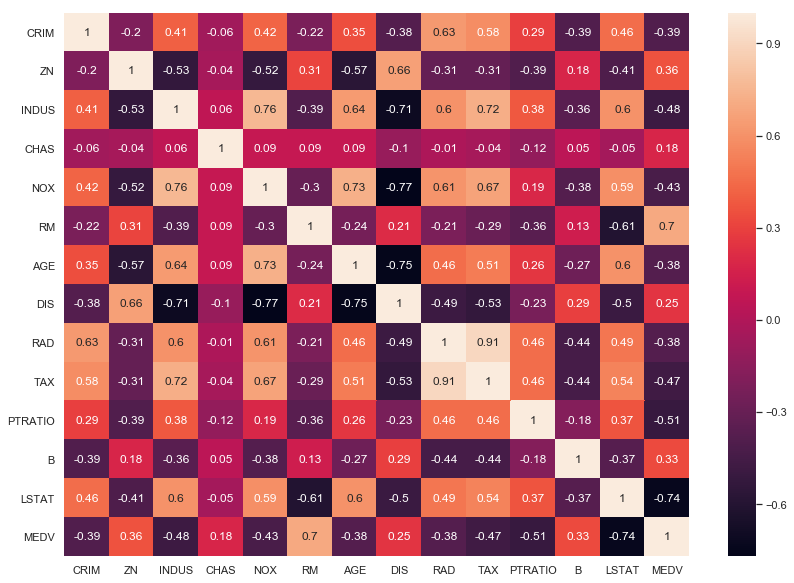

In [3]:
import pandas as pd
import seaborn as sns
sns.set()

plt.figure(figsize=(14, 10));
df = pd.DataFrame(data=np.c_[D.data, D.target], columns=list(D.feature_names) + ['MEDV'])
sns.heatmap(df.corr().round(2), annot=True);

Ploting the best choosen features to see if they are really that easily separable

Text(0.5, 0, 'RM')

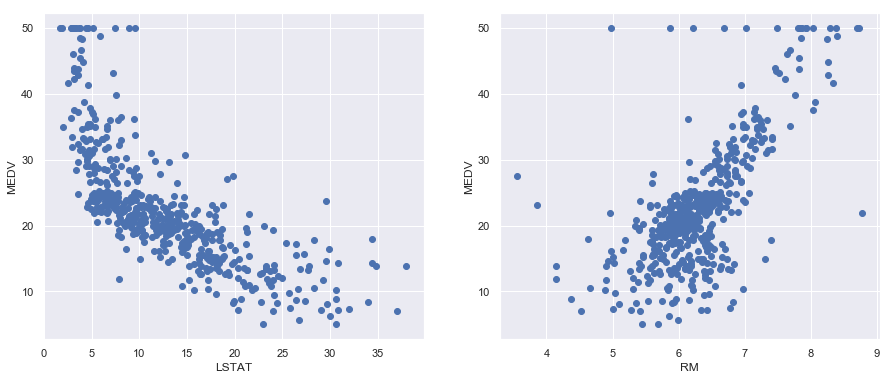

In [4]:
plt.figure(figsize=(15, 6));

plt.subplot(121)
plt.scatter(df['LSTAT'], df['MEDV']);
plt.ylabel('MEDV')
plt.xlabel('LSTAT')

plt.subplot(122)
plt.scatter(df['RM'], df['MEDV']);
plt.ylabel('MEDV')
plt.xlabel('RM')

The **RM** feature seems to be more straight for a linear regressor so I choose that as an independent variable

In [5]:
X, y = df['RM'].values, df['MEDV'].values

Now we take a look at the data, how it looks like, needs preprocessing or not, etc.

In [6]:
print('Number of measurements:', X.shape[0])
print('Max measurement value:', X.max())
print('Min measurement value:', X.min())
print('The first 5 rows of X:', X[:5])
print('The first 5 rows of Y:', y[:5])

Number of measurements: 506
Max measurement value: 8.78
Min measurement value: 3.561
The first 5 rows of X: [6.575 6.421 7.185 6.998 7.147]
The first 5 rows of Y: [24.  21.6 34.7 33.4 36.2]


Choose the number of mesurements to train on and the number of mesurements we will use for testing/validating the model. I will do 90/10 split, with 10% as the test set.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

This data needs preprocessing, I will scale data

In [8]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = X_scaler.transform(X_test.reshape(-1, 1))
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

print('The first 5 rows of scaled X:', X_train_scaled[:5].reshape(1, -1)[0])
print('The first 5 rows of scaled Y:', y_train_scaled[:5].reshape(1, -1)[0])

The first 5 rows of scaled X: [0.58804369 0.34163633 0.5581529  0.52711247 0.5276873 ]
The first 5 rows of scaled Y: [0.48       0.33333333 0.32888889 0.36       0.38444444]


Now, we finally build &amp; fit the model. I will use the [simple linear regression formula](https://en.wikipedia.org/wiki/Simple_linear_regression). For gradient descent optimization see the _Gradient descent demonstration_ notebook in the notebooks folder.

In [9]:
# fitting the model
_x_mean = X_train_scaled.mean()
_y_mean = y_train_scaled.mean()
_x_var_sqrd = X_train_scaled - _x_mean
N = len(X_train_scaled)

slope = np.sum(X_train_scaled*y_train_scaled - N*_x_mean*_y_mean) / np.sum(X_train_scaled**2 - N*_x_mean**2)
intercept = _y_mean - _x_mean*slope

print('slope\t\t=\t', slope)
print('intercept\t=\t', intercept)

slope		=	 0.7473190383835697
intercept	=	 2.2546366694298214e-05


Plot the results

Text(0.5, 1.0, 'Test set')

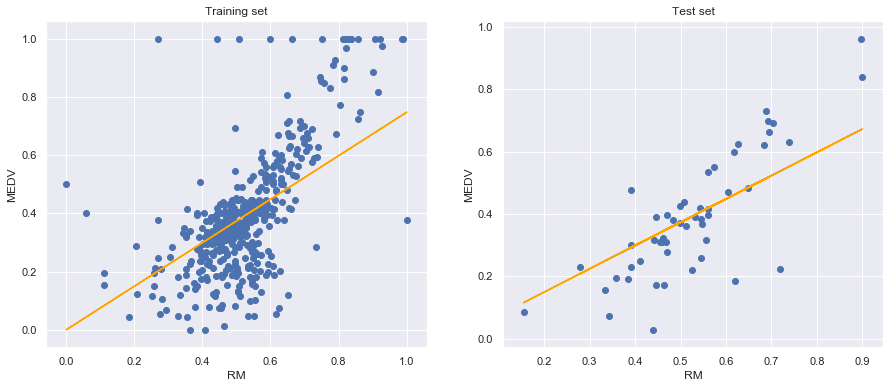

In [11]:
plt.figure(figsize=(15, 6));

y_train_pred = slope*X_train_scaled - intercept
y_test_pred = slope*X_test_scaled - intercept

plt.subplot(121)
plt.scatter(X_train_scaled, y_train_scaled);
plt.plot(X_train_scaled, y_train_pred, color='orange');
plt.ylabel('MEDV')
plt.xlabel('RM')
plt.title('Training set')

plt.subplot(122)
plt.scatter(X_test_scaled, y_test_scaled);
plt.plot(X_test_scaled, y_test_pred, color='orange');
plt.ylabel('MEDV')
plt.xlabel('RM')
plt.title('Test set')

See the Mean Sqared Error of our model

In [12]:
from sklearn.metrics import mean_squared_error

print('MSE on train:', mean_squared_error(y_train_scaled, y_train_pred))
print('MSE on test:', mean_squared_error(y_test_scaled, y_test_pred))

MSE on train: 0.02401200928072486
MSE on test: 0.016459864326270526
